# Descriptive Data Analysis & DAGs for Emotions & `winProb`, `win`, `angleProp`
---
## Investigating Emotions over the Monetary Outcomes of Wheel-Spin Game using Bayesian Models

***by Irem Arici***

**January 2024**

---

The dataset consists of ID for each worker, totaling to 100 workers, where they
have spun the wheel 10 times each. Each of the 18 pre-generated wheels is composed of
three different payoff amounts with different probabilities according to their proportion of
the wheel. Each worker has won one of these three payoffs, denoted as win amount, and
its corresponding probability. 

In addition, dataset also includes the position of pointer for
each wheel slice of amount won, angle proportion, denoted as a formalized value between
0 and 1, 0.5 being the middle of the slice the pointer has landed finally. Specifically, a
value closer to 0 indicates the closeness of the edge of the previous slice for payoff, and
vice versa for the values near 1. 

Each outcome for worker has been assessed for each likely
emotion outcome for the winner by evaluators in a 9-point Likert scale, namely for
emotions 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'content', 'disappointment'.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import graphviz
%matplotlib inline 

In [32]:
sns.set_palette("deep")

In [29]:
df = pd.read_csv("expt1data.csv")

## Additional `maxEmotion` variable

In [30]:
emotion_rating = df.iloc[:, [11,12,13,14,15,16,17,18]]
max_column = emotion_rating.idxmax(axis=1)
df["maxEmotion"] = max_column
df.maxEmotion.value_counts()

maxEmotion
happy       642
disapp      166
surprise     59
content      56
sad          55
anger        15
disgust       5
fear          2
Name: count, dtype: int64

# Emotions vs winProb, win, angleProp Boxplots

/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_1923/43025870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["win"], x = df["maxEmotion"], data = df, palette="deep")


Text(0, 0.5, 'Win amount')

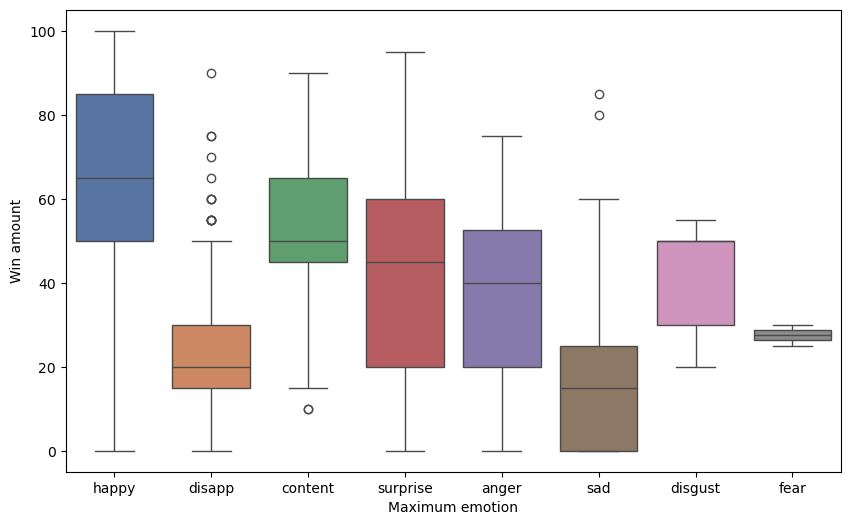

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df["win"], x = df["maxEmotion"], data = df, palette="deep")
plt.xlabel("Maximum emotion")
plt.ylabel("Win amount")

/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_1923/2664769347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y = "angleProp", x="maxEmotion", palette="deep")


Text(0, 0.5, 'Angle proportion')

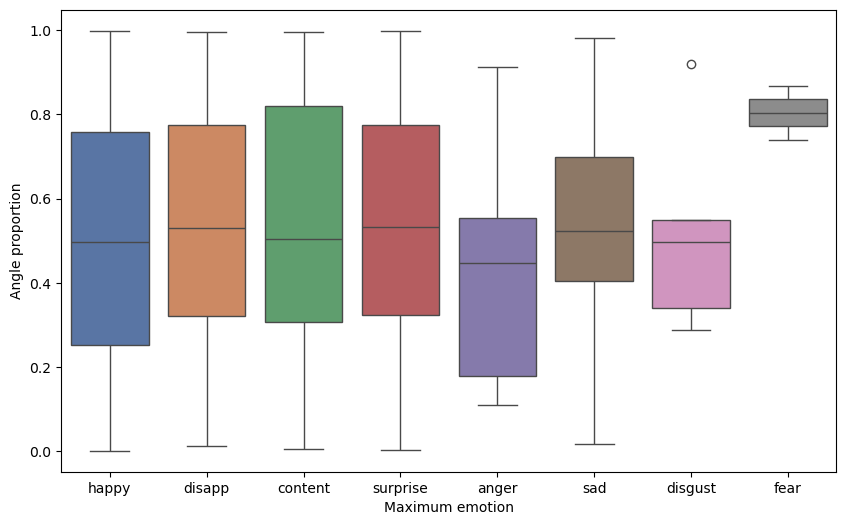

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y = "angleProp", x="maxEmotion", palette="deep")
plt.xlabel("Maximum emotion")
plt.ylabel("Angle proportion")

/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_1923/4171516191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y = "winProb", x="maxEmotion",palette="deep")


Text(0, 0.5, 'Win probability')

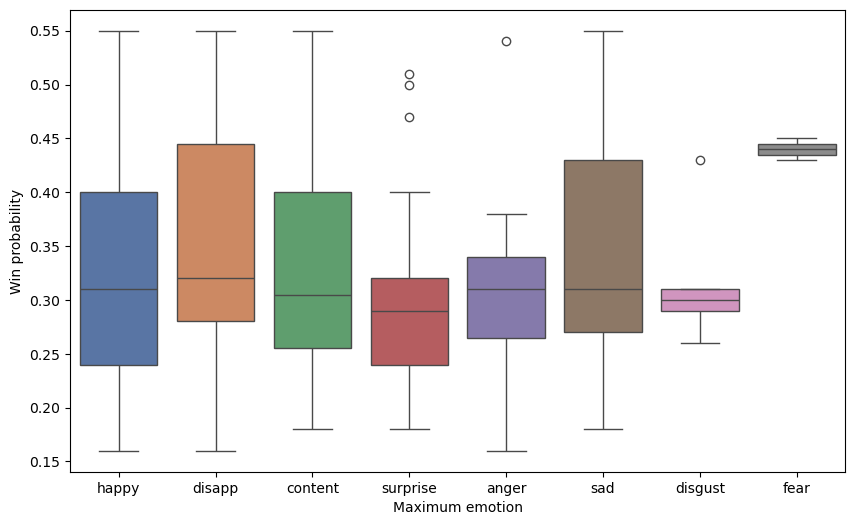

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y = "winProb", x="maxEmotion",palette="deep")
plt.xlabel("Maximum emotion")
plt.ylabel("Win probability")

# Emotions vs winProb, win, angleProp KDE plots

Text(0.5, 0, 'Win amount')

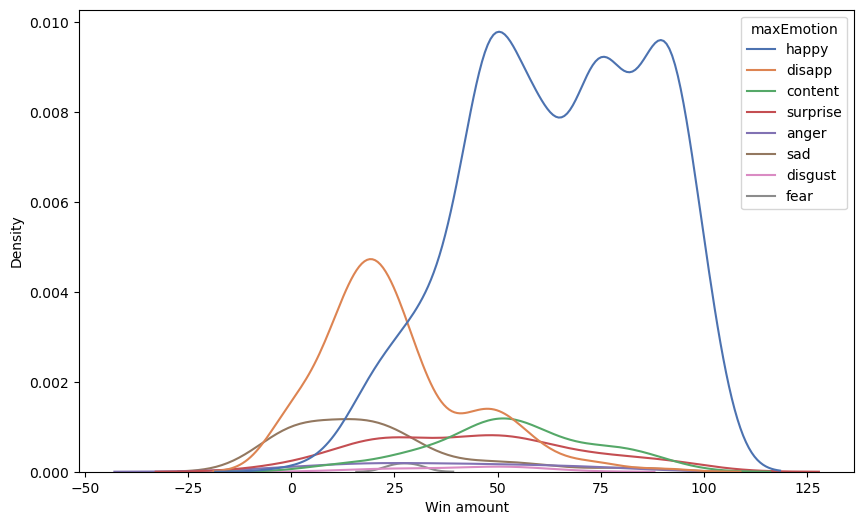

In [36]:
plt.figure(figsize=(10,6))
grid = sns.kdeplot(df,x = "win",hue = "maxEmotion", palette="deep")
plt.xlabel("Win amount")

Text(0.5, 0, 'Win proportion')

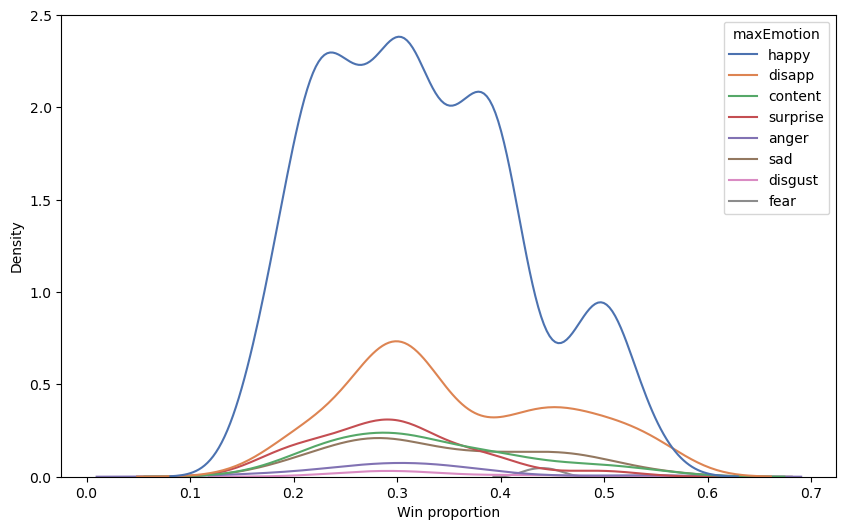

In [37]:
plt.figure(figsize=(10,6))
grid = sns.kdeplot(df,x = "winProb",hue="maxEmotion", palette="deep")
plt.xlabel("Win proportion")

Text(0.5, 0, 'Angle proportion')

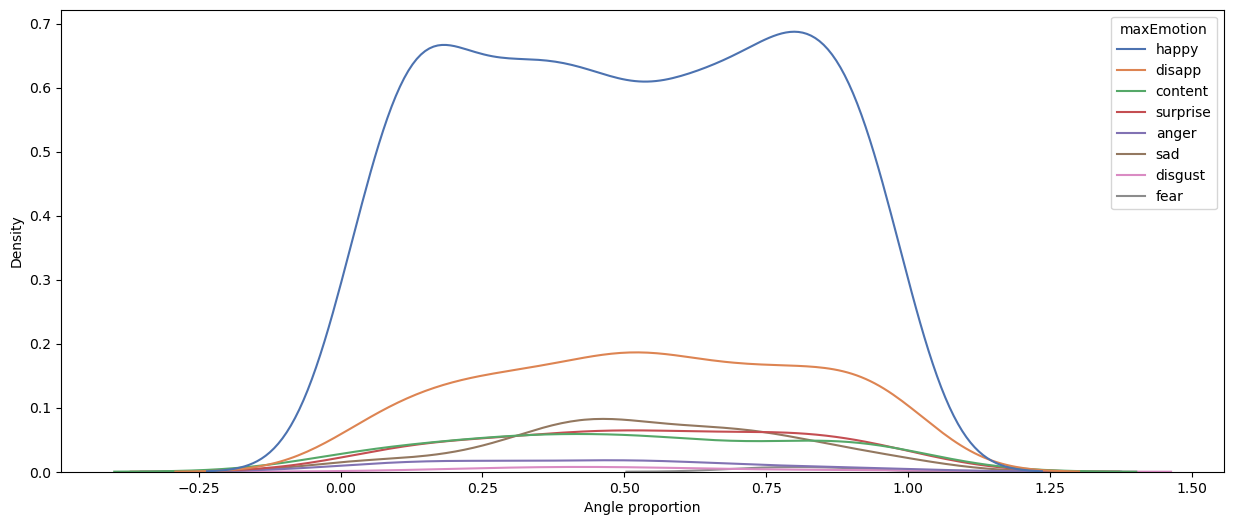

In [38]:
plt.figure(figsize=(15,6))
grid = sns.kdeplot(df,x = "angleProp",hue="maxEmotion", palette="deep")
plt.xlabel("Angle proportion")

/Users/iremarici/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


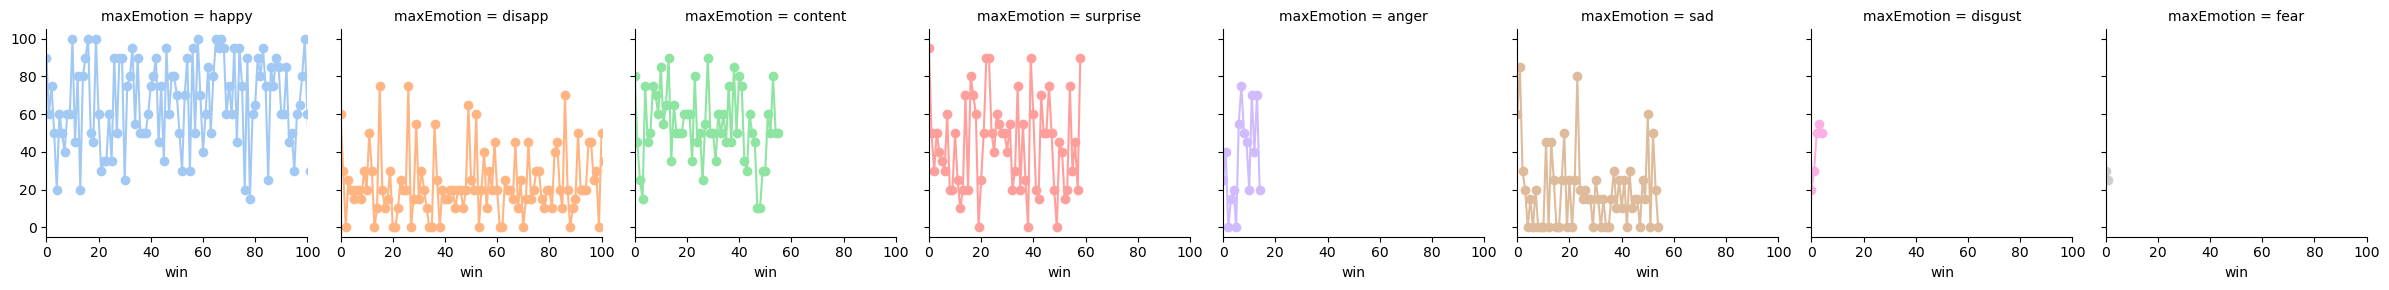

In [39]:
grid = sns.FacetGrid(df,col="maxEmotion", hue="maxEmotion", palette="pastel", xlim=(0,100))
grid.map(plt.plot, "win", marker="o")

/Users/iremarici/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


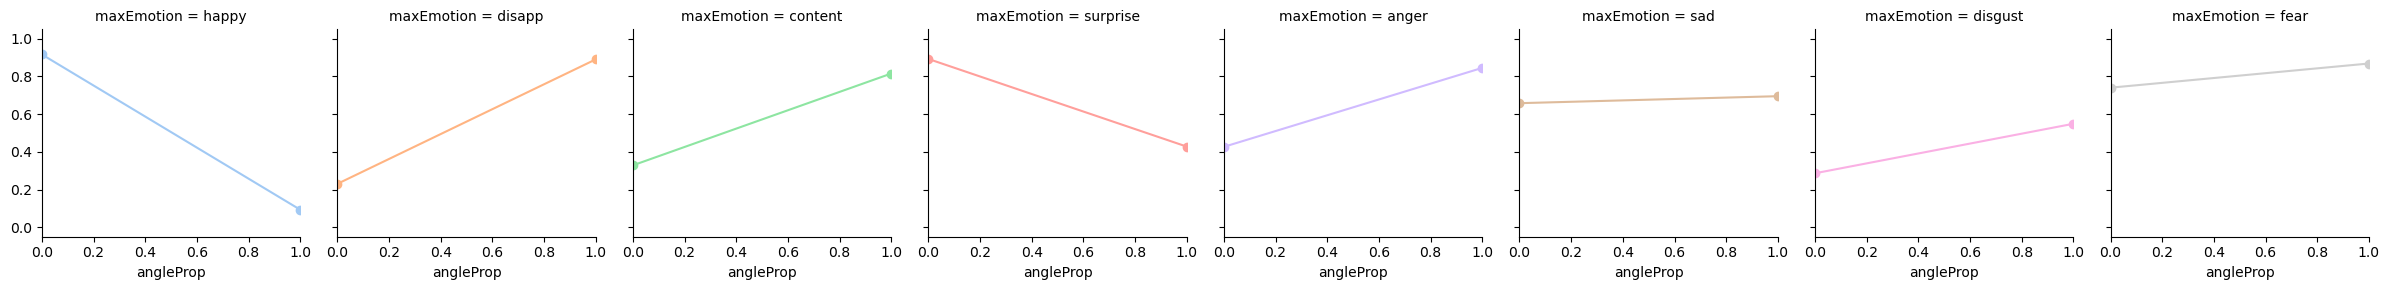

In [40]:
grid = sns.FacetGrid(df,col ="maxEmotion", hue="maxEmotion", palette="pastel", xlim=(0,1))
grid.map(plt.plot, "angleProp", marker="o")

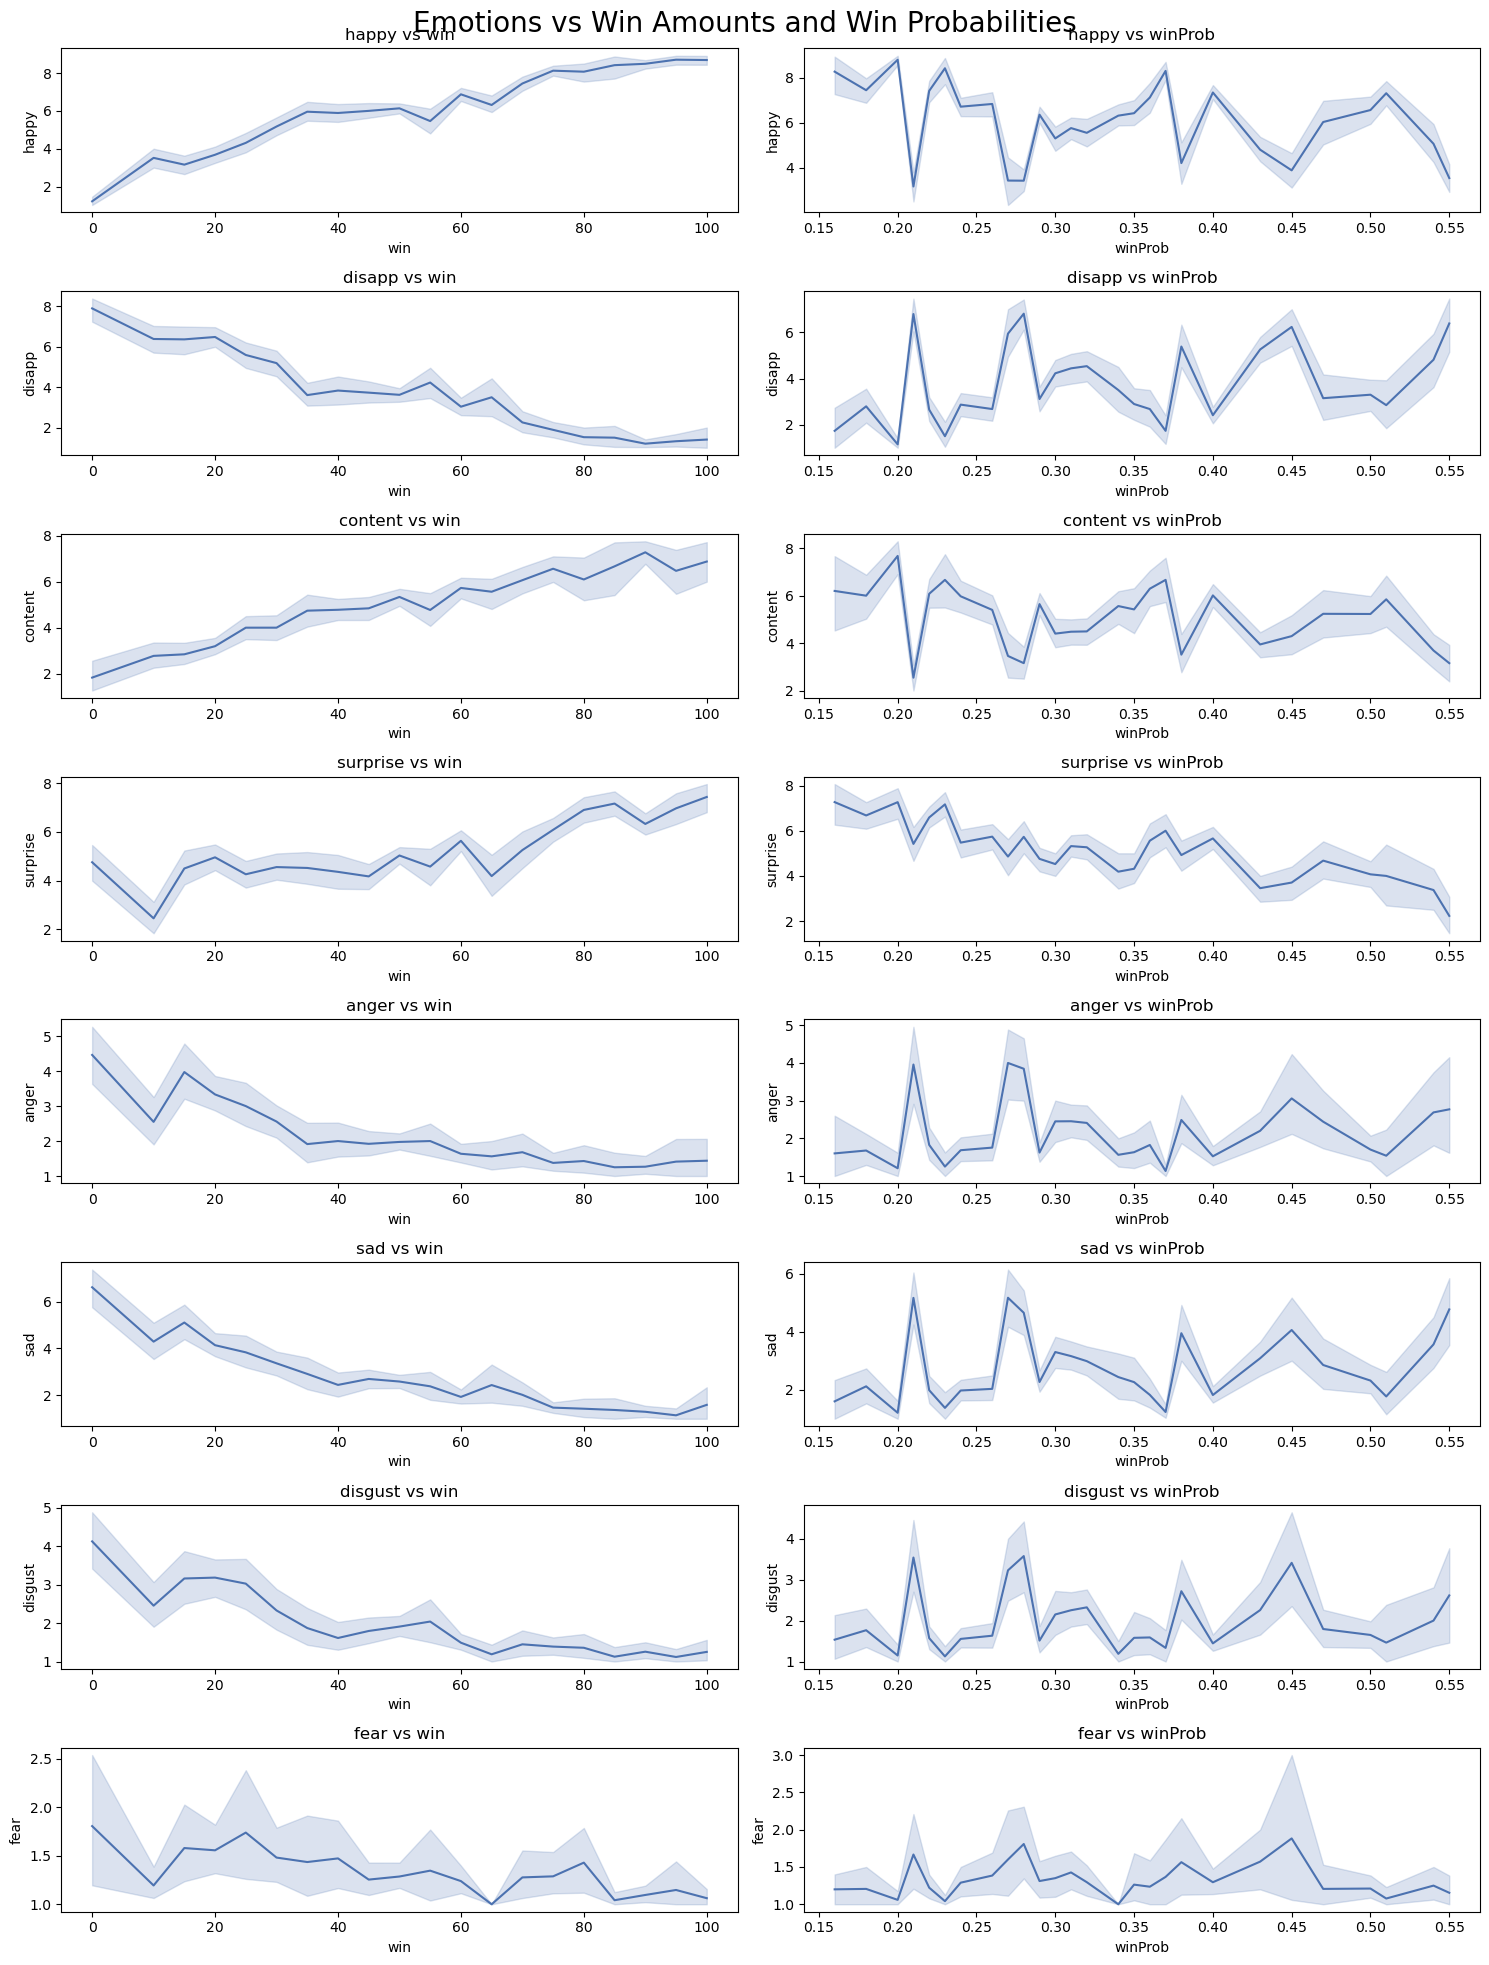

In [54]:
# This plots show angleProp weird, so there is another plot for angleProp below

emotions = df["maxEmotion"].unique()
win_winprob = ['win', 'winProb']

num_cols = len(win_winprob)
num_rows = len(emotions)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.suptitle("Emotions vs Win Amounts and Win Probabilities",va = "top", size = 20)  

for i, emotion in enumerate(emotions):
    for j, feature in enumerate(win_winprob):
        ax = axes[i, j]
        sns.lineplot(data=df, x=feature, y=emotion, ax=ax)
        ax.set_title(f'{emotion} vs {feature}')
      
plt.tight_layout()

# Emotion Heatmaps

<Axes: title={'center': 'Heatmap of correlations between each emotion'}>

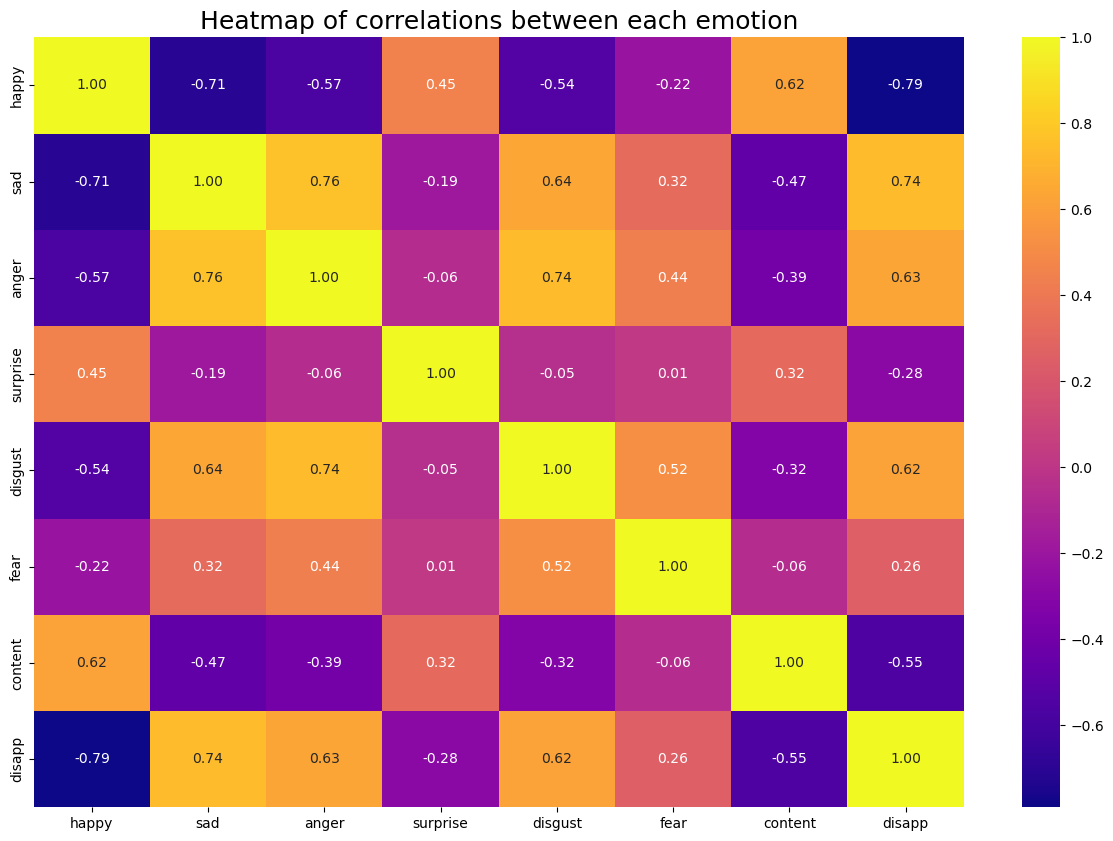

In [41]:
emotions_data = df[['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear', 'content', 'disapp']]
correlation_matrix = emotions_data.corr()

plt.figure(figsize=(15, 10))
plt.title("Heatmap of correlations between each emotion", size=18)
plt.xlabel
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")

# DAG visualizations

In [47]:
doti = graphviz.Digraph("dag", comment="DAG for emotion and variables")

In [48]:
doti.node("emotion", "Emotion")
doti.node("winProb", "Win probability")
doti.node("win", "Win amount")
doti.node("angleProp", "Angle proportion")

doti.edge("win", "emotion")
doti.edge("winProb", "emotion")
doti.edge("angleProp", "emotion")
doti.edge("winProb", "win")

doti.render(view=True, format = "png")

'dag.gv.png'

In [23]:
# Generates DAG for each emotion
def generate_dag_for_emotion(emotion):

    dot = graphviz.Digraph()

    dot.node(emotion)
    dot.node("win", "Win amount")
    dot.node("winProb", "Win probability")
    dot.node("angleProp", "Angle proportion")

    dot.edge("win", emotion)
    dot.edge("winProb", emotion)
    dot.edge("winProb", "win")
    dot.edge("angleProp", emotion)

    dot.render(filename=f'dag_{emotion}', view= True)

for emotion in emotions:
    generate_dag_for_emotion(emotion)